In [1]:
import numpy as np

In [2]:
from tqdm import tqdm_notebook as tqdm

In [3]:
def split_area(point1 = 0, point2 = 2, N = 10):
    delta = (point2 - point1) / (N)
    points = [(point1 + (delta*i)) for i in range(N + 1)]
    return points

In [4]:
def f(x, y):
    return 2 * x * y

def y(x):
    return np.exp(x**2 - 3)

a = 0
b = 2
y_0 = 1 / np.exp(3)
N = 50

In [5]:
x = split_area(a, b, N=N)

In [6]:
y_num = []
h = x[1] - x[0]
y_num.append(y_0)
for i in range(N):
    y_predict = y_num[i] + h*f(x[i],y_num[i])
    y_correct = y_num[i] + h*(
        (f(x[i], y_num[i]) +
         f(x[i+1], y_predict)) / 2
    )
    y_num.append(y_correct)

In [7]:
delta = []
for i in range(N):
    delta_i = np.abs(y_num[i] - y(x[i]))
    delta.append(delta_i)

In [10]:
print("|  x_i | yn_i  |  y_i  |  d_i  |")
print("|------------------------------|")
for n, x_i, yn_i, y_i, delta_i in zip(list(range(N)), x, y_num, [y(x_) for x_ in x], delta):
    print(f"|{x_i:6.3f}|{yn_i:6.5f}|{y_i:6.5f}|{delta_i:6.5f}|")

|  x_i | yn_i  |  y_i  |  d_i  |
|------------------------------|
| 0.000|0.04979|0.04979|0.00000|
| 0.040|0.04987|0.04987|0.00000|
| 0.080|0.05011|0.05011|0.00000|
| 0.120|0.05051|0.05051|0.00000|
| 0.160|0.05108|0.05108|0.00000|
| 0.200|0.05182|0.05182|0.00000|
| 0.240|0.05274|0.05274|0.00000|
| 0.280|0.05385|0.05385|0.00000|
| 0.320|0.05515|0.05516|0.00000|
| 0.360|0.05668|0.05668|0.00000|
| 0.400|0.05842|0.05843|0.00000|
| 0.440|0.06042|0.06042|0.00000|
| 0.480|0.06268|0.06269|0.00000|
| 0.520|0.06524|0.06525|0.00000|
| 0.560|0.06812|0.06813|0.00000|
| 0.600|0.07136|0.07136|0.00001|
| 0.640|0.07498|0.07499|0.00001|
| 0.680|0.07905|0.07906|0.00001|
| 0.720|0.08360|0.08361|0.00001|
| 0.760|0.08869|0.08871|0.00002|
| 0.800|0.09440|0.09442|0.00002|
| 0.840|0.10079|0.10082|0.00003|
| 0.880|0.10797|0.10800|0.00004|
| 0.920|0.11602|0.11607|0.00005|
| 0.960|0.12507|0.12513|0.00006|
| 1.000|0.13526|0.13534|0.00007|
| 1.040|0.14675|0.14684|0.00009|
| 1.080|0.15972|0.15984|0.00012|
| 1.120|0.

## Определить значение N* для ошибки < 10^-2

In [11]:
def compute_error_wrt_N(N=10):
    x = split_area(a, b, N=N)
    y_num = []
    h = x[1] - x[0]
    y_num.append(y_0)
    for i in range(N):
        y_predict = y_num[i] + h*f(x[i],y_num[i])
        y_correct = y_num[i] + h*(
            (f(x[i], y_num[i]) +
             f(x[i+1], y_predict)) / 2
        )
        y_num.append(y_correct)
        
    delta = []
    for i, x_i in enumerate(x):
        delta_i = np.abs(y_num[i] - y(x_i))
        delta.append(delta_i)
        
    return np.max(delta[1:])

In [16]:
errors = []
for N_i in tqdm(np.linspace(start=1, stop=9000, num=9000)):
    error = compute_error_wrt_N(int(N_i))
    errors.append(error)
    if error < 0.000001:
        print(f"N* = {int(N_i)}")
        print(f"Error = {error:6.20f}")
        break

N* = 7613
Error = 0.00000099997473945734


In [17]:
import matplotlib.pyplot as plt

In [25]:
def plot(errors, from_=500):
    plt.figure(figsize=(20, 20))
    x = np.linspace(start=from_, stop=len(errors), num=len(errors)-from_)
    y = errors[from_:]
    plt.plot(x, y)

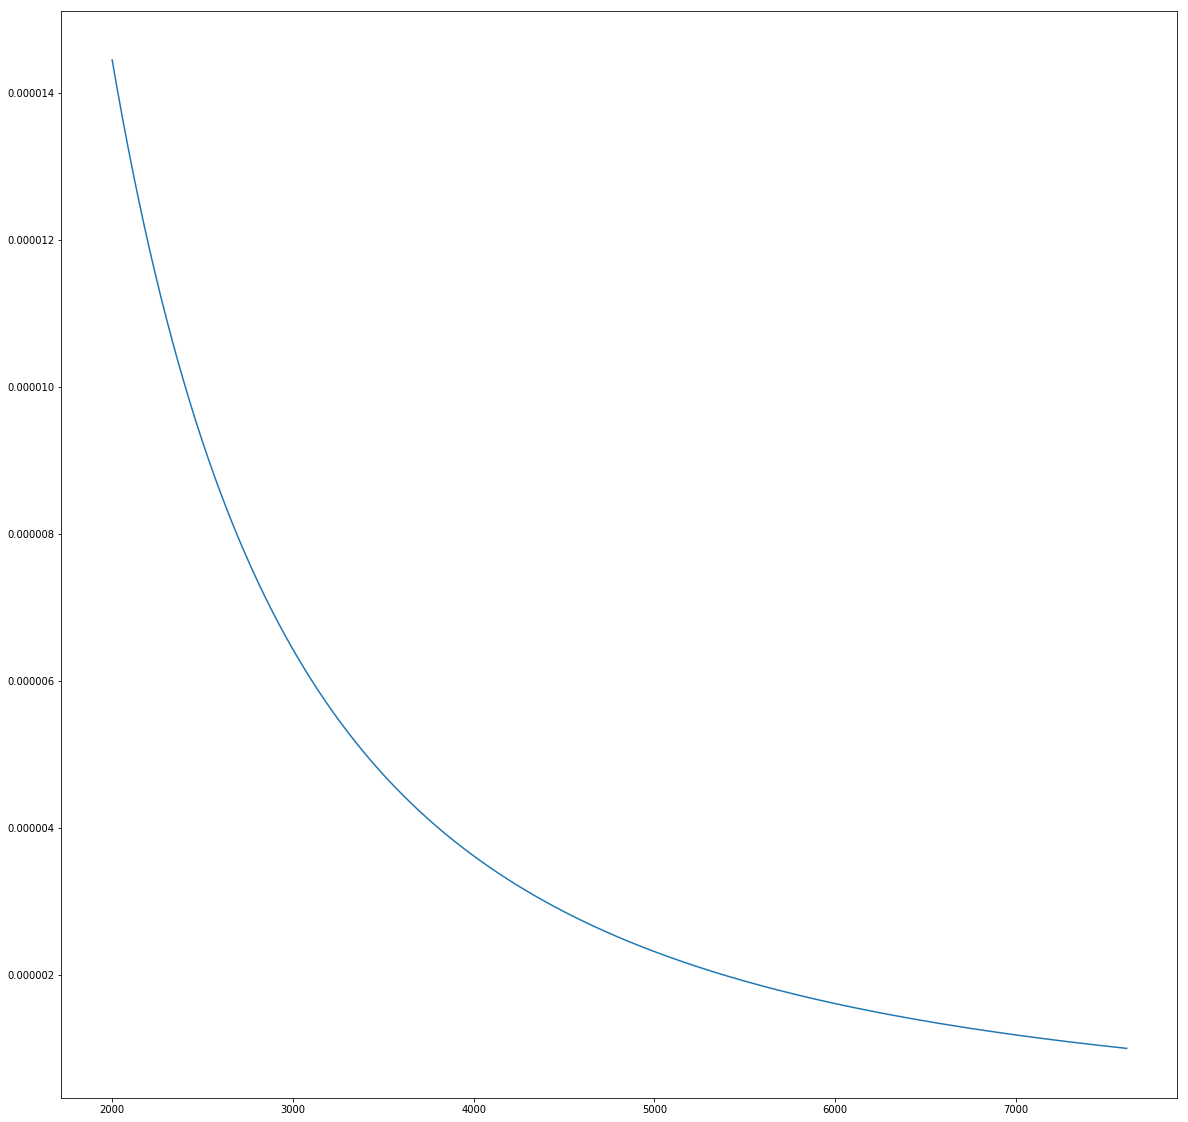

In [28]:
plot(errors, 2000)